Importing libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Loading Our Dataset

In [22]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start = start, end=end)

[*********************100%***********************]  1 of 1 completed


Feature Extraction

In [23]:
df = df.drop(['Adj Close'], axis = 'columns')
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,93121200


Splitting Data and Training Model


In [24]:
x = df[['Open', 'High', 'Low', 'Volume', 'Close']].values
new_df = df.drop(df.index[0])
y = new_df[['Open', 'High', 'Low', 'Volume', 'Close']].values
X = x[:-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predicting Close values

In [35]:
predicted = model.predict(X_test)
predicted

array([[2.01650000e+01, 2.03902535e+01, 2.00368712e+01, 3.70668340e+08,
        2.02061106e+01],
       [1.80498822e+01, 1.83780785e+01, 1.78247961e+01, 6.06685268e+08,
        1.82099179e+01],
       [1.75589571e+01, 1.77221323e+01, 1.74239748e+01, 3.37927492e+08,
        1.75689996e+01],
       ...,
       [4.07699250e+01, 4.13360245e+01, 4.05191757e+01, 1.30540332e+08,
        4.10886743e+01],
       [1.48170608e+01, 1.49198606e+01, 1.47183394e+01, 3.35084456e+08,
        1.48291463e+01],
       [3.10479497e+01, 3.15448507e+01, 3.08157752e+01, 3.30137144e+08,
        3.11586749e+01]])

Model Accuracy

In [36]:
model.score(predicted, y_test)

0.9125669740777651

Plotting Predicted Close values and Actual Close values

In [57]:
predicted_close = predicted[:100,4]
close = y_test[:100,4]

Text(0.5, 1.0, 'Predicted Close vs. Actual Close for first 100 test cases')

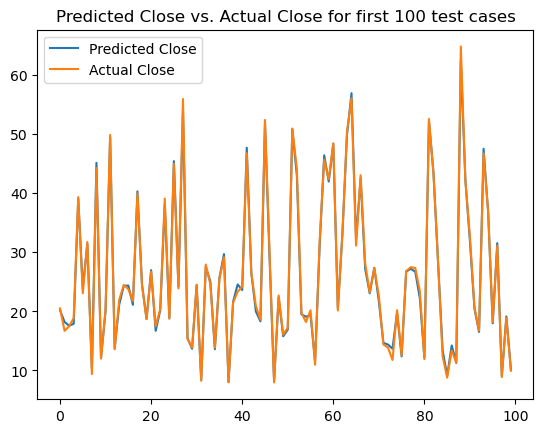

In [58]:
plt.plot(predicted_close, label='Predicted Close')
plt.plot(close, label='Actual Close')
plt.legend()
plt.title('Predicted Close vs. Actual Close for first 100 test cases')